In [196]:
# TRAIN_A.csv [파일]: A 관망 구조의 분 단위 데이터 (24/05/27 00:00 ~ 24/06/26 15:00)
# TRAIN_B.csv [파일]: B 관망 구조의 분 단위 데이터 (24/07/01 00:00 ~ 24/07/29 23:59)
# timestamp: 분 단위 시점
# Q: 유량
# M: 펌프가동정보 (On=1, Off=0)
# P: 압력
# anomaly: 해당 시점에서의 정상(0), 이상(1) 여부
# P_flag: 해당 시점에서의 압력계의 정상(0), 이상(1) 여부


# test [폴더]: 예측 현재 시점 T를 포함한 최대 일주일(Lookback 기간)에 대한 평가 데이터 샘플
# C [폴더]: C 관망 구조의 현재 예측 시점 T로 구성된 TEST_C_0000.csv ~ TEST_C_2919.csv의 추론용 평가 데이터 샘플
# D [폴더]: D 관망 구조의 현재 예측 시점 T로 구성된 TEST_D_0000.csv ~ TEST_D_2737.csv의 추론용 평가 데이터 샘플
# timestamp: 현재 시점 T가 비식별화된 분 단위 시점
# Q: 유량
# M: 펌프가동정보 (On=1, Off=0)
# P: 압력


# meta_관망구조이미지 [폴더]
# train [폴더]: A, B 관망 구조 이미지
# test [폴더]: C, D 관망 구조 이미지


# test.csv [파일]
# ID : 평가 데이터 샘플 식별 ID
# path : 평가 데이터 샘플 경로


# sample_submission.csv [제출 양식]
# ID : 평가 데이터
# P : 압력에 대한 정상 or 비정상 구분

In [197]:
import pandas as pd

df_A = pd.read_csv("../data/train/TRAIN_A.csv")
df_B = pd.read_csv("../data/train/TRAIN_B.csv")

df_C = pd.read_csv("../data/test/C/TEST_C_0000.csv")
df_D = pd.read_csv("../data/test/D/TEST_D_0000.csv")

df_A['timestamp'] = pd.to_datetime(df_A['timestamp'], format='%y/%m/%d %H:%M')
df_B['timestamp'] = pd.to_datetime(df_B['timestamp'], format='%y/%m/%d %H:%M')

df_A.set_index('timestamp', inplace=True)
df_B.set_index('timestamp', inplace=True)

In [198]:
df_A.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6', 'M7',
       'M8', 'M9', 'M10', 'M11', 'M12', 'M13', 'M14', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8', 'P9', 'P10', 'P11', 'P12', 'P13', 'P14', 'P15',
       'P16', 'P17', 'P18', 'P19', 'P20', 'P21', 'P22', 'P23', 'P24', 'P25',
       'P26', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag', 'P4_flag', 'P5_flag',
       'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag', 'P10_flag', 'P11_flag',
       'P12_flag', 'P13_flag', 'P14_flag', 'P15_flag', 'P16_flag', 'P17_flag',
       'P18_flag', 'P19_flag', 'P20_flag', 'P21_flag', 'P22_flag', 'P23_flag',
       'P24_flag', 'P25_flag', 'P26_flag'],
      dtype='object')

In [199]:
df_B.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8',
       'P9', 'P10', 'anomaly', 'P1_flag', 'P2_flag', 'P3_flag', 'P4_flag',
       'P5_flag', 'P6_flag', 'P7_flag', 'P8_flag', 'P9_flag', 'P10_flag'],
      dtype='object')

In [200]:
df_C.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'M1', 'M2',
       'M3', 'M4', 'M5', 'M6', 'M7', 'M8', 'M9', 'M10', 'P1', 'P2', 'P3', 'P4',
       'P5', 'P6', 'P7', 'P8'],
      dtype='object')

In [201]:
df_D.columns

Index(['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'M1', 'M2', 'M3', 'M4', 'M5',
       'M6', 'M7', 'M8', 'M9', 'M10', 'M11', 'P1', 'P2', 'P3', 'P4', 'P5',
       'P6'],
      dtype='object')

In [202]:
x_c_col = ['P1','P2','P3','P4','P5','P6','P7','P8']
x_d_col = ['P1','P2','P3','P4','P5','P6']

y_col = 'anomaly'

# C

In [203]:
df_A_C = df_A[x_c_col + [y_col]]
df_B_C = df_B[x_c_col + [y_col]]

df_C = pd.concat([df_A_C, df_B_C])

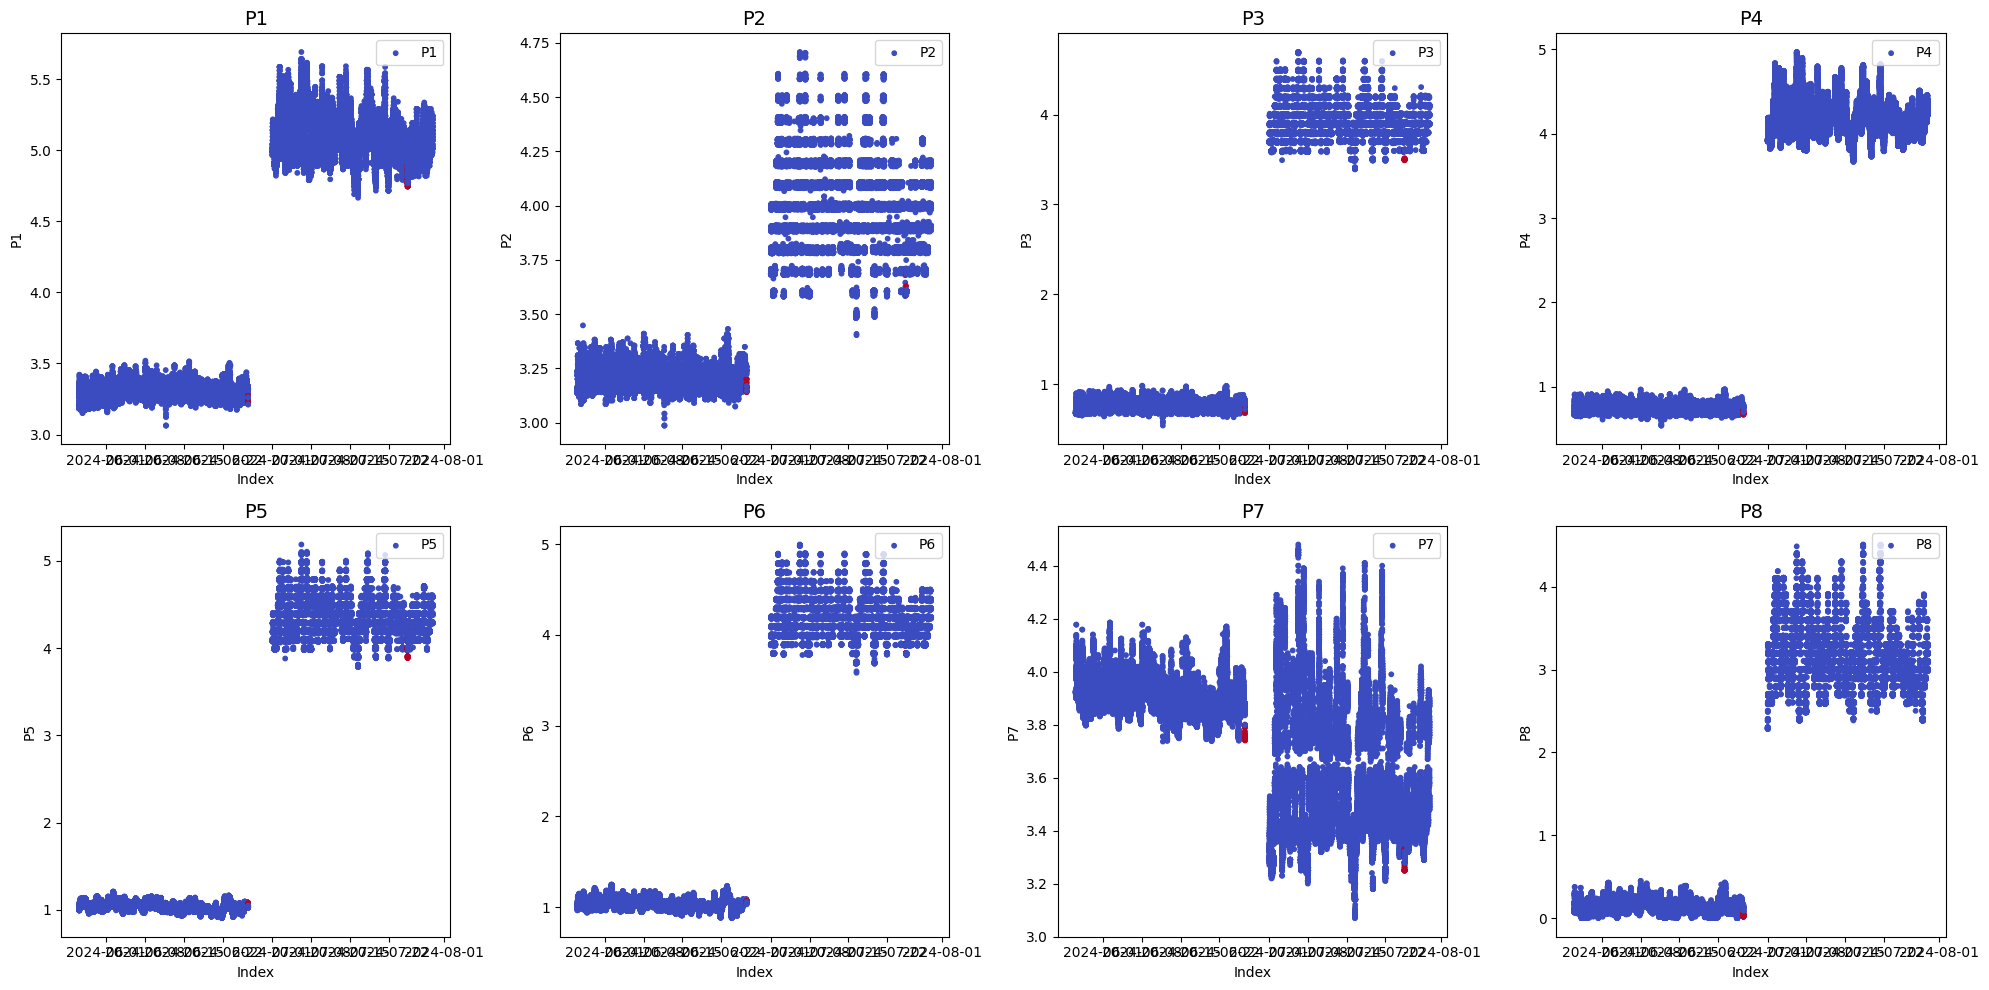

In [206]:
import matplotlib.pyplot as plt

# 서브플롯 생성
fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # 2행 4열의 서브플롯
axes = axes.flatten()  # 2D 배열 -> 1D로 평탄화

# 각 피처별 그래프 그리기
for i, feature in enumerate(x_c_col):
    axes[i].scatter(df_C.index, df_C[feature], c=df_C['anomaly'], cmap='coolwarm', s=10, label=feature)
    axes[i].set_title(f'{feature}', fontsize=14)
    axes[i].set_xlabel('Index')
    axes[i].set_ylabel(feature)
    axes[i].legend(loc='upper right')

# 레이아웃 조정
plt.tight_layout()
# 이미지 저장
image_path = "plot.png"
plt.savefig(image_path)
plt.show()

In [207]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

df_C.loc[:, x_c_col] = scaler.fit_transform(df_C.loc[:, x_c_col])

df_C.head()

,P1,P2,P3,P4,P5,P6,P7,P8,anomaly
timestamp,,,,,,,,,
2024-05-27 00:00:00,0.054363,0.102138,0.038389,0.034544,0.035041,0.039863,0.609078,0.025795,0
2024-05-27 00:01:00,0.054363,0.098943,0.040870,0.036465,0.038125,0.043725,0.605461,0.025373,0
2024-05-27 00:02:00,0.056457,0.098943,0.032970,0.033707,0.033943,0.034179,0.606383,0.021824,0
2024-05-27 00:03:00,0.056457,0.098943,0.032970,0.033707,0.033943,0.034179,0.606383,0.021824,0
2024-05-27 00:04:00,0.052269,0.102138,0.034102,0.033481,0.036793,0.035539,0.609929,0.021004,0


## Preprocessing

In [173]:
from sklearn.model_selection import train_test_split

# 독립 변수(X)와 종속 변수(y) 분리
X = df_C.drop(columns=['anomaly'])
y = df_C['anomaly']

# 시계열 순서 유지하며 분리
split_idx = int(len(X) * 0.8)
x_train, x_val = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_val = y.iloc[:split_idx], y.iloc[split_idx:]

## Modeling

In [208]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, accuracy_score

# Isolation Forest 모델 학습
model = IsolationForest(contamination=0.05, random_state=42)  # 이상치 비율 설정
model.fit(x_train)

IsolationForest(contamination=0.05, random_state=42)

In [209]:
# x_val에 대한 예측 수행
val_predictions = model.predict(x_val)

# 예측값 변환 (-1 → 1, 1 → 0)
val_predictions = (val_predictions == -1).astype(int)

In [210]:
from sklearn.metrics import classification_report, accuracy_score

# 성능 평가
print("Classification Report:")
print(classification_report(y_val, val_predictions))

# 정확도
accuracy = accuracy_score(y_val, val_predictions)
print(f"Accuracy: {accuracy:.2f}")

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.97     17140
           1       0.03      0.76      0.05        33

    accuracy                           0.94     17173
   macro avg       0.51      0.85      0.51     17173
weighted avg       1.00      0.94      0.97     17173

Accuracy: 0.94


## test_c data

## submission

In [187]:
sub_df = pd.read_csv("../data/sample_submission.csv")

In [194]:
sub_df[:5]

,ID,flag_list
0,TEST_C_0000,"[0, 0, 0, 0, 0, 0, 0, 0]"
1,TEST_C_0001,"[0, 0, 0, 0, 0, 0, 0, 0]"
2,TEST_C_0002,"[0, 0, 0, 0, 0, 0, 0, 0]"
3,TEST_C_0003,"[0, 0, 0, 0, 0, 0, 0, 0]"
4,TEST_C_0004,"[0, 0, 0, 0, 0, 0, 0, 0]"


In [195]:
sub_df[-5:]

,ID,flag_list
5653,TEST_D_2733,"[0, 0, 0, 0, 0, 0]"
5654,TEST_D_2734,"[0, 0, 0, 0, 0, 0]"
5655,TEST_D_2735,"[0, 0, 0, 0, 0, 0]"
5656,TEST_D_2736,"[0, 0, 0, 0, 0, 0]"
5657,TEST_D_2737,"[0, 0, 0, 0, 0, 0]"
